<div style="display: flex; align-items: center; justify-content: center; flex-wrap: wrap;">
    <div style="flex: 1; max-width: 400px; display: flex; justify-content: center;">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" style="max-width: 50%; height: auto; margin-top: 50px; margin-bottom: 50px;margin-left: 3rem;">
    </div>
    <div style="flex: 2; text-align: center; margin-top: 20px;">
        <div style="font-size: 28px; font-weight: bold; line-height: 1.2;">
            <span style="color: #08306B;">ML Project |</span> <span style="color: #08529C;">To Grant or Not to Grant</span>
        </div>
        <div style="font-size: 17px; font-weight: bold; margin-top: 10px;">
            Fall Semester | 2024 - 2025
        </div>
        <div style="font-size: 17px; font-weight: bold;">
            Master in Data Science and Advanced Analytics
        </div>
        <div style="margin-top: 20px;">
            <div>André Silvestre, 20240502</div>
            <div>João Henriques, 20240499</div>
            <div>Simone Genovese, 20241459</div>
            <div>Steven Carlson, 20240554</div>
            <div>Vinícius Pinto, 20211682</div>
            <div>Zofia Wojcik, 20240654</div>
        </div>
        <div style="margin-top: 20px; font-weight: bold;">
            TBL Group 33
        </div>
    </div>
</div>

## 📚 Libraries Import


In [55]:
# For data
import pandas as pd
import numpy as np
import os

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.lines as mlines
import missingno as msno

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

# Set the style of the visualization
pd.set_option('display.max_columns', None) # display all columns

# Disable FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Setting seaborn style
sns.set_theme(style="white")

## 🧮 Import Databases

In [56]:
# Importing the dataset
train_data = pd.read_parquet('data/1stNotebook/train_data_cleaned.parquet')
test_data = pd.read_parquet('data/1stNotebook/test_data_cleaned.parquet')

In [57]:
# Display the first 2 rows of each dataset
train_data.head(2) 

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Birth Year Clean,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,C-3 Date Year,C-3 Date Month,C-3 Date Day,C-3 Date Weekday,First Hearing Date Year,First Hearing Date Month,First Hearing Date Day,First Hearing Date Weekday,Claim Injury Type
0,2019-12-30,31,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaT,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,ST. LAWRENCE,N,SYRACUSE,NaT,M,NaN,44.0,RETAIL TRADE,I,27,FROM LIQUID OR GREASE SPILLS,10,CONTUSION,62,BUTTOCKS,13662,1,1,1,1988.0,31.0,0,0,1A. PRIVATE,4 - Fall,1 - Specific,IV - Trunk,2019.0,12.0,30.0,0.0,2020,1,1,2,2019.0,12.0,31.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2. NON-COMP
1,2019-08-30,46,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,97,REPETITIVE MOTION,49,SPRAIN OR TEAR,38,SHOULDER(S),14569,4,0,0,1973.0,46.0,1,1,1A. PRIVATE,6 - Strain_data,1 - Specific,III - Upper Extremities,2019.0,8.0,30.0,4.0,2020,1,1,2,2020.0,1.0,1.0,2.0,2020.0,1.0,14.0,1.0,2020.0,2.0,21.0,4.0,4. TEMPORARY


In [58]:
test_data.head(2)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Birth Year Clean,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,C-3 Date Year,C-3 Date Month,C-3 Date Day,C-3 Date Weekday,First Hearing Date Year,First Hearing Date Month,First Hearing Date Day,First Hearing Date Weekday
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaT,INDEMNITY INSURANCE CO OF,1A. PRIVATE,BRONX,N,NYC,NaT,M,NaN,48.0,TRANSPORTATION AND WAREHOUSING,IV,31,"FALL, SLIP OR TRIP, NOC",10,CONTUSION,54,LOWER LEG,10466,1,1,1,2003.0,19.0,0,0,1A. PRIVATE,4 - Fall,1 - Specific,V - Lower Extremities,2022.0,12.0,24.0,5.0,2023,1,2,0,2023.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaT,A I U INSURANCE COMPANY,1A. PRIVATE,QUEENS,N,NYC,NaT,F,NaN,45.0,RETAIL TRADE,IV,75,FALLING OR FLYING OBJECT,10,CONTUSION,10,MULTIPLE HEAD INJURY,11691,1,1,1,2003.0,19.0,0,0,1A. PRIVATE,8 - Struck,1 - Specific,I - Head,2022.0,11.0,20.0,6.0,2023,1,2,0,2023.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# <a class='anchor' id='2'></a>
<br>
<style>
@import url('https://fonts.cdnfonts.com/css/avenir-next-lt-pro?styles=29974');
</style>

<div style="background: linear-gradient(to right,#08529C, #08306B); 
            padding: 10px; color: white; border-radius: 300px; text-align: center;">
    <center><h1 style="margin-left: 140px;margin-top: 10px; margin-bottom: 4px; color: white;
                       font-size: 32px; font-family: 'Avenir Next LT Pro', sans-serif;">
        <b>2 | Data Preparation</b></h1></center>
</div>

<br><br>

### **🛠️ Drop Columns Unnecessary for the Model**

In [59]:
train_data[train_data.columns.sort_values()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574026 entries, 0 to 574025
Data columns (total 59 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Accident Date Day                  570337 non-null  float64       
 2   Accident Date Month                570337 non-null  float64       
 3   Accident Date Weekday              570337 non-null  float64       
 4   Accident Date Year                 570337 non-null  float64       
 5   Age at Injury                      574026 non-null  int64         
 6   Age at Injury Clean                571840 non-null  float64       
 7   Alternative Dispute Resolution     574026 non-null  object        
 8   Assembly Date                      574026 non-null  datetime64[ns]
 9   Assembly Date Day                  574026 non-null  int32         
 10  Assembly Date Month 

In [64]:
# Drop the Dates columns
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date'] # Because we have all extracted columns from it

# Drop the columns based on Correlation Analysis [1st Notebook]
columns_to_drop = ['Age at Injury',    # Because we have Age at Injury Cleaned
                   'Birth Year',       # Because we have Age at Injury Cleaned [It's redundant]
                   'Birth Year Clean', # Because we have Age at Injury Cleaned [It's redundant]
                   'Average Weekly Wage', # Because we create a new column from it ['Weekly Wage Reported']
                   'Carrier Name',     # Because we don't know how to treat text for now
                   'Carrier Type',     # Because we create a new column from it ['Carrier Type Bucket']
                   'IME-4 Count',      # Because we create a new column from it ['IME-4 Reported']
                   'Industry Code Description',  # Because we have 'Industry Code'
                   'Zip Code',          # Because we have 'Medical Fee Region' [It's redundant]
                   'WCIO Cause of Injury Description',  # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Cause of Injury Code',         # Because we have 'WCIO Cause of Injury Bucket'
                   'WCIO Part Of Body Description',     # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Part Of Body Code',            # Because we have 'WCIO Part of Body Bucket'
                   'WCIO Nature of Injury Description', # Because we have 'WCIO Nature of Injury Bucket'
                   'WCIO Nature of Injury Code',        # Because we have 'WCIO Nature of Injury Bucket'

                   # Dates columns that we don't need
                   'C-3 Date Year', 'C-3 Date Month', 'C-3 Date Day', 'C-3 Date Weekday',
                   'First Hearing Date Year', 'First Hearing Date Month', 'First Hearing Date Day', 'First Hearing Date Weekday'
]

train_data = train_data.drop(columns = date_columns + columns_to_drop)
test_data = test_data.drop(columns = date_columns + columns_to_drop)

In [65]:
# Show the columns of the training set (train_data) that have missing values and are 'object' type
train_data.select_dtypes(include = 'object').columns[train_data.select_dtypes(include = 'object').isnull().any()]

Index([], dtype='object')

> Since our approach to the **`NA's`** of categorical variables is to replace them with a new category, it is confirmed that no variable currently has **`NA's`**.

In [67]:
# Show the columns of the training set 'object' type
train_data.select_dtypes(include = 'object').columns

Index(['Alternative Dispute Resolution', 'Attorney/Representative',
       'County of Injury', 'COVID-19 Indicator', 'District Name', 'Gender',
       'Medical Fee Region', 'Carrier Type Bucket',
       'WCIO Cause of Injury Bucket', 'WCIO Nature of Injury Bucket',
       'WCIO Part of Body Bucket', 'Claim Injury Type'],
      dtype='object')

> For **`object`** type variables, we will use some **Enconding** techniques to transform them into **numerical** variables, since the model does not accept **`object`** type variables.

---

### ⚖️ **Training/Validation Division**

> Before starting the feature engineering process that will be carried out in the next steps, we will divide the training data into training and validation sets. This will allow us to evaluate the performance of the models we will develop.

In [68]:
# Splitting the data into training and validation sets
X = train_data.drop(columns = ['Claim Injury Type'])
y = train_data['Claim Injury Type']
X_train, X_val, y_train, y_val = train_test_split(X,y,                 # X and y
                                                  test_size = 0.25,    # 75% train, 25% validation
                                                  random_state = 2024, # Seed
                                                  stratify = y,        # Keep the same proportion of target classes (because of imbalance)
                                                  shuffle = True)      # Shuffle the data

In [69]:
# Check the shape of the training and validation sets
X_train.shape, X_val.shape

((430519, 30), (143507, 30))

In [70]:
# Check the columns of the training set (X_train) that are not in the validation set (X_val)
set(X_train.columns) - set(X_val.columns) # Perfect!

set()

In [71]:
# Check the information of the training set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430519 entries, 522354 to 179683
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Alternative Dispute Resolution  430519 non-null  object 
 1   Attorney/Representative         430519 non-null  object 
 2   County of Injury                430519 non-null  object 
 3   COVID-19 Indicator              430519 non-null  object 
 4   District Name                   430519 non-null  object 
 5   Gender                          430519 non-null  object 
 6   Industry Code                   423065 non-null  float64
 7   Medical Fee Region              430519 non-null  object 
 8   Number of Dependents            430519 non-null  int64  
 9   C-3 Date Binary                 430519 non-null  int32  
 10  First Hearing Date Binary       430519 non-null  int32  
 11  Age at Injury Clean             428886 non-null  float64
 12  Weekly Wage Repo

In [72]:
# Show the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().any()]

Index(['Industry Code', 'Age at Injury Clean', 'Accident Date Year',
       'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

> Since we have missing values in the dataset, we will need to use some technique to fill in on next steps.

---

### <a class='anchor' id='DP_FeatureEng'></a> 🛠️ **Feature Engineering**

##### **Most Used Feature Engineering Techniques**

+ **Binning / Bucketizing** ✅    
  - Grouping of values into "bins" or "buckets"
  
<br>

1. **Splitting the Data** ✅
    - Training Data
    - Validation Data

2. **Handling Missing Values**
    - Drop Missing Values
    - Impute Missing Values (e.g., using some statistical measure, KNN, etc.)

3. **Encoding**
    - Label Encoding using Scikit-learn
    - One-Hot Encoding using Scikit-learn

4. **Multicollinearity**
    - Variance Inflation Factor (VIF)
  
5. **Normalize / Standardize** <sup>*</sup> [We will do it on the next notebook] - [3. Modeling&Evaluation]('./3_Modeling&Evaluation_MLProject_Group33.ipynb')
    - Normalize and Standardize using Scikit-learn

<br>

<sup><b>*</b></sup>
**Note:** We will **Normalize / Standardize** the data in the next notebook, since that will create more datasets to work with. It is better to do it after the **Feature Engineering** process.



---

#### **2 | Handling Missing Values**

In [ ]:
print(X_train.isnull().mean()[X_train.isnull().mean() > 0]*100)

In [85]:
# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Industry Code', 'Age at Injury Clean', 'Accident Date Year',
       'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
       'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

> Since **`Industry Code`** are categorical variables, we will replace the **`NA's`** with a new category **`0` $\rightarrow$ Unknown**.
> 

In [90]:
# Fill the missing values of 'Industry Code' with '0'
X_train['Industry Code'] = X_train['Industry Code'].fillna(0)
X_val['Industry Code'] = X_val['Industry Code'].fillna(0)
test_data['Industry Code'] = test_data['Industry Code'].fillna(0)

# Check the columns of the training set (X_train) that have missing values
X_train.columns[X_train.isnull().sum()>0]

Index(['Age at Injury Clean', 'Accident Date Year', 'Accident Date Month',
       'Accident Date Day', 'Accident Date Weekday', 'C-2 Date Year',
       'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday'],
      dtype='object')

---

In [91]:
######################### First Approach: Filling with Central Tendency Measures #########################
# # Impute missing values of Dates columns with the 'mean' strategy [Because they don't have outliers]
# for col in ['Accident Date Year', 'Accident Date Month', 'Accident Date Day', 'Accident Date Weekday',
#             'Assembly Date Year', 'Assembly Date Month', 'Assembly Date Day', 'Assembly Date Weekday',
#             'C-2 Date Year', 'C-2 Date Month', 'C-2 Date Day', 'C-2 Date Weekday',
    
#             ###################### TEMPORARY ######################
#             'Average Weekly Wage', 'Birth Year', 'Industry Code',
#             'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
#             'WCIO Part Of Body Code', 'Birth Year Clean', 'Age at Injury Clean'
#             ]:
    
#     # Mean value for each column in the training, validation and test data
#     mean_value_X_train = X_train[col].mean()
#     mean_value_X_val = X_val[col].mean()
#     mean_value_test_data = test_data[col].mean()
    
#     # Fill missing values
#     X_train[col].fillna(mean_value_X_train, inplace = True)
#     X_val[col].fillna(mean_value_X_val, inplace = True)
#     test_data[col].fillna(mean_value_test_data, inplace = True)

##############################################################################################################

##### **KNN Imputer <sup>[[1]](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)</sup>**

In [ ]:
# Fill the rest of columns with missing values with the KNNImputer

# Copy the data
df_knn_imputed = X_train.copy(deep=True)                             # deep=True to avoid the SettingWithCopyWarning
df_knn_imputed_n = df_knn_imputed.select_dtypes(include="number")    # Select numerical columns

# Init the transformer
knn_imp = KNNImputer()                                               # k=5 is the default 

# Fit/transform
df_knn_imputed_n.loc[:, :] = knn_imp.fit_transform(df_knn_imputed_n)

# Check the columns of the training set (X_train) that have missing values
df_knn_imputed_n.columns[X_train.isnull().sum()>0]

In [25]:
# Now do the same for the validation and test data
X_val_knn_imputed = X_val.copy(deep=True)
X_val_knn_imputed_n = X_val_knn_imputed.select_dtypes(include="number")
X_val_knn_imputed_n.loc[:, :] = knn_imp.transform(X_val_knn_imputed_n)

test_data_knn_imputed = test_data.copy(deep=True)
test_data_knn_imputed_n = test_data_knn_imputed.select_dtypes(include="number")
test_data_knn_imputed_n.loc[:, :] = knn_imp.transform(test_data_knn_imputed_n)

---

#### **3 | Encoding**

- Feature encoding is a process used to transform categorical data into numerical values that can be understood by ML algorithms. 
- There are several types of encoding, including label encoding and one-hot encoding.

<br><br>

<div style="max-width:750px; display: block; margin: 0 auto;">

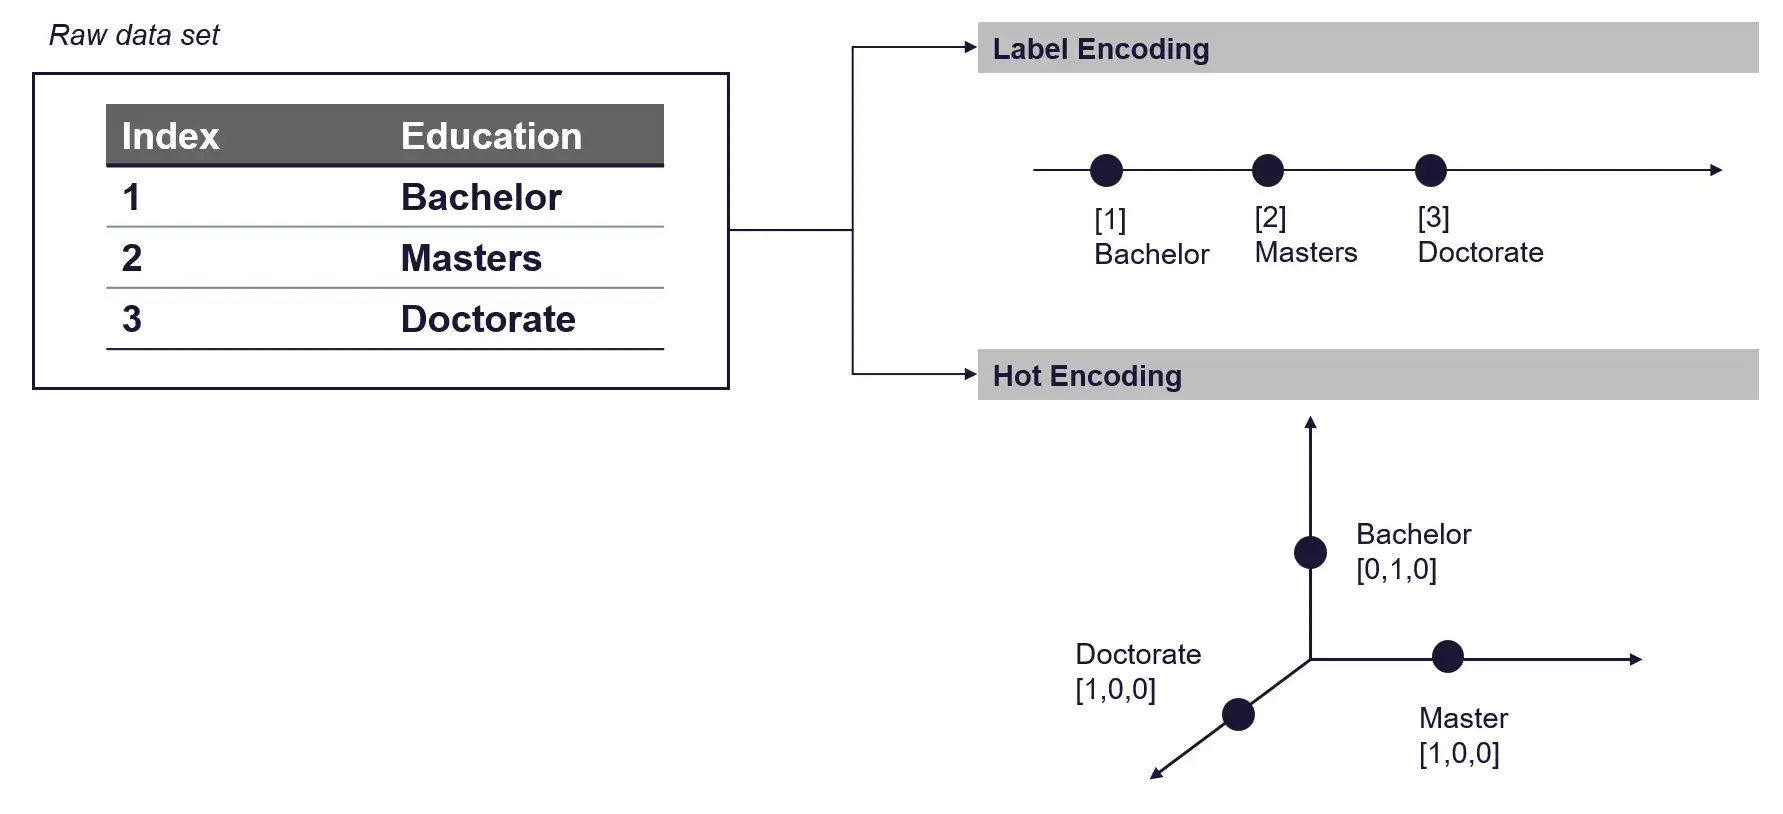
    
</div>


---

##### **Label Encoding**

- **Label encoding** involves assigning a numeric value to each categorical value. 
- Can be effective if exists an inherent order to the categorical values, which can be encoded as numeric values from $1$ to $k$. 
- This way of encoding can cause problems for some algorithms because the assigned integers do not necessarily reflect any inherent order or relationship between the categories. 
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values.

<br>

##### **One-Hot Encoding**

- In **One-hot encoding**, the column of categorical values is split into several new columns, one for each unique categorical value.
- Alternatively, you can use **One-hot encoding** to transform categorical values into numerical values. 
- In **one-hot encoding**, we represent a categorical variable as a group of binary variables, where each binary variable represents one category. 
- The binary variable indicates whether the category is present in an observation ($1$) or not ($0$). 
- A categorical variable with $n$ unique categories can be encoded in $(n-1)$ binary variables.
- This results in a *sparse matrix*, where most of the values are $0$.
- The disadvantage of one-hot encoding is that it can significantly increase the size of the dataset, which can be a problem if the column you want to encode contains hundreds or thousands of unique categorical values.
- I.e., the problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality.

In [73]:
# Mapping the target variable 'Claim Injury Type' to numerical values
claim_injury_type_dict = {"1. CANCELLED": 1, "2. NON-COMP": 2, "3. MED ONLY": 3, "4. TEMPORARY": 4, 
                          "5. PPD SCH LOSS": 5, "6. PPD NSL": 6, "7. PTD": 7, "8. DEATH": 8}

# Encode the target variable
y_train_encoded = y_train.map(claim_injury_type_dict)
y_val_encoded = y_val.map(claim_injury_type_dict)

# Check the first 5 values of the encoded target variable [Compare with the original target variable]
pd.DataFrame({'Original': y_train, 'Encoded': y_train_encoded})

,Original,Encoded
522354,2. NON-COMP,2
106294,4. TEMPORARY,4
239178,2. NON-COMP,2
276985,4. TEMPORARY,4
548104,2. NON-COMP,2
...,...,...
163734,2. NON-COMP,2
447809,4. TEMPORARY,4
197034,4. TEMPORARY,4
261663,3. MED ONLY,3


In [74]:
# Replace the target variable 'Claim Injury Type' with the encoded values, after confirming the correctness of the encoding
y_train = y_train_encoded
y_val = y_val_encoded

<div class="alert alert-block alert-info" style="font-size: 50px;">

> CONFIRMAR O QUE ESTÁ NO NOTEBOOK DA AULA

</div>

In [81]:
################### First Approach: Label Encoding ###################
# Label Encoding

# Create a new dataframe to store the encoded columns
X_train_encoded = X_train.copy()
X_val_encoded = X_val.copy()
test_data_encoded = test_data.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the training data [All categorical columns will be transformed into numerical values]
for col in X_train.select_dtypes(include = 'object').columns:
    
    # Fit and transform the training data and save it in the same dataframe with '_encoded' suffix
    X_train[col] = label_encoder.fit_transform(X_train[col])
    
    # Transform the validation data -> I just 'transform' it because the label_encoder is already fitted on the training data
    X_val[col] = label_encoder.transform(X_val[col])
    
    # Transform the test data
    test_data[col] = label_encoder.transform(test_data[col])

######################################################################

In [82]:
# Check the label encoded columns
X_train.head(2)

,Alternative Dispute Resolution,Attorney/Representative,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Medical Fee Region,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,Alternative Dispute Resolution_encoded,Attorney/Representative_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,District Name_encoded,Gender_encoded,Medical Fee Region_encoded,Carrier Type Bucket_encoded,WCIO Cause of Injury Bucket_encoded,WCIO Nature of Injury Bucket_encoded,WCIO Part of Body Bucket_encoded
522354,0,0,6,0,2,0,56.0,0,6,1,1,47.0,0,0,1,5,1,5,2022.0,9.0,22.0,3.0,2022,9,27,1,2022.0,9.0,27.0,1.0,0,0,6,0,2,0,0,1,5,1,5
106294,0,1,23,0,4,0,62.0,3,3,0,0,52.0,1,1,1,9,1,2,2020.0,8.0,5.0,2.0,2020,8,13,3,2020.0,8.0,17.0,0.0,0,1,23,0,4,0,3,1,9,1,2


In [79]:
################### Second Approach: One-Hot Encoding ###################
# One-Hot Encoding

# Create a new dataframe for the One-Hot Encoding
X_train_ohe = X_train.copy()
X_val_ohe = X_val.copy()
test_data_ohe = test_data.copy()

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder()

# Fit and transform the training data [All categorical columns will be transformed into numerical values]
for col in X_train.select_dtypes(include = 'object').columns:
    
    # ----------------------- Training Data -----------------------
    # Fit and transform the training data
    ohe = one_hot_encoder.fit_transform(X_train[col].values.reshape(-1,1)).toarray()

    # Create a new dataframe with the encoded values
    df_one_hot = pd.DataFrame(ohe, columns = [col + '_' + str(int(i)) for i in range(ohe.shape[1])])

    # Concatenate the new dataframe with the training data
    X_train_ohe = pd.concat([X_train_ohe, df_one_hot], axis = 1)

    # Drop the original column
    X_train_ohe = X_train_ohe.drop(columns = col)

    # ----------------------- Validation Data -----------------------
    # Transform the validation data
    ohe = one_hot_encoder.transform(X_val[col].values.reshape(-1,1)).toarray()

    # Create a new dataframe with the encoded values
    df_one_hot = pd.DataFrame(ohe, columns = [col + '_' + str(int(i)) for i in range(ohe.shape[1])])

    # Concatenate the new dataframe with the validation data
    X_val_ohe = pd.concat([X_val_ohe, df_one_hot], axis = 1)

    # Drop the original column
    X_val_ohe = X_val_ohe.drop(columns = col)

    # ----------------------- Test Data -----------------------
    # Transform the test data
    ohe = one_hot_encoder.transform(test_data[col].values.reshape(-1,1)).toarray()

    # Create a new dataframe with the encoded values
    df_one_hot = pd.DataFrame(ohe, columns = [col + '_' + str(int(i)) for i in range(ohe.shape[1])])

    # Concatenate the new dataframe with the test data
    test_data_ohe = pd.concat([test_data_ohe, df_one_hot], axis = 1)

    # Drop the original column
    test_data_ohe = test_data_ohe.drop(columns = col)
    
#########################################################################

In [83]:
# Check the One-Hot encoded columns
X_train_ohe.head(2)

,Alternative Dispute Resolution,Attorney/Representative,County of Injury,COVID-19 Indicator,District Name,Gender,Industry Code,Medical Fee Region,Number of Dependents,C-3 Date Binary,First Hearing Date Binary,Age at Injury Clean,Weekly Wage Reported,IME-4 Reported,Carrier Type Bucket,WCIO Cause of Injury Bucket,WCIO Nature of Injury Bucket,WCIO Part of Body Bucket,Accident Date Year,Accident Date Month,Accident Date Day,Accident Date Weekday,Assembly Date Year,Assembly Date Month,Assembly Date Day,Assembly Date Weekday,C-2 Date Year,C-2 Date Month,C-2 Date Day,C-2 Date Weekday,Alternative Dispute Resolution_encoded,Attorney/Representative_encoded,County of Injury_encoded,COVID-19 Indicator_encoded,District Name_encoded,Gender_encoded,Medical Fee Region_encoded,Carrier Type Bucket_encoded,WCIO Cause of Injury Bucket_encoded,WCIO Nature of Injury Bucket_encoded,WCIO Part of Body Bucket_encoded
522354,0,0,6,0,2,0,56.0,0,6,1,1,47.0,0,0,1,5,1,5,2022.0,9.0,22.0,3.0,2022,9,27,1,2022.0,9.0,27.0,1.0,0,0,6,0,2,0,0,1,5,1,5
106294,0,1,23,0,4,0,62.0,3,3,0,0,52.0,1,1,1,9,1,2,2020.0,8.0,5.0,2.0,2020,8,13,3,2020.0,8.0,17.0,0.0,0,1,23,0,4,0,3,1,9,1,2


---

#### **4 | Multicollinearity**

In [ ]:
### use VIF to analise multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Compute the vif for all given features
def compute_vif(df, considered_features='all'):
    """
    :param df: DataFrame containing the features to compute VIF for.
    :param considered_features: List of features to consider for VIF calculation. If 'all', all features in the DataFrame will be considered.
    
    :return: DataFrame containing VIF values for the considered features.
    """
    # If no features are given, consider all features
    if considered_features == 'all':
        considered_features = df.columns
    
    # Create a new dataframe with the considered features
    X = df[considered_features]
    
    # Ensure all features are numeric
    for column in X.columns:
        X[column] = pd.to_numeric(X[column], errors='coerce')
    
    # The calculation of variance inflation requires a constant
    X['intercept'] = 1
    
    # Create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    
    vif = vif[vif['Variable']!='intercept']
    return vif

# Features to consider removing (VIF >5)
compute_vif(X_train).sort_values('VIF', ascending=False)

---

## **🎚️ Feature Selection** 

### **Filter Methods**

- Correlation coefficient
- Chi-Square Test
- Information Gain

### **Wrapper Methods**

- Recursive Feature Elimination (RFE)

### **Embedded Methods**

- Lasso Regression
- Ridge Regression

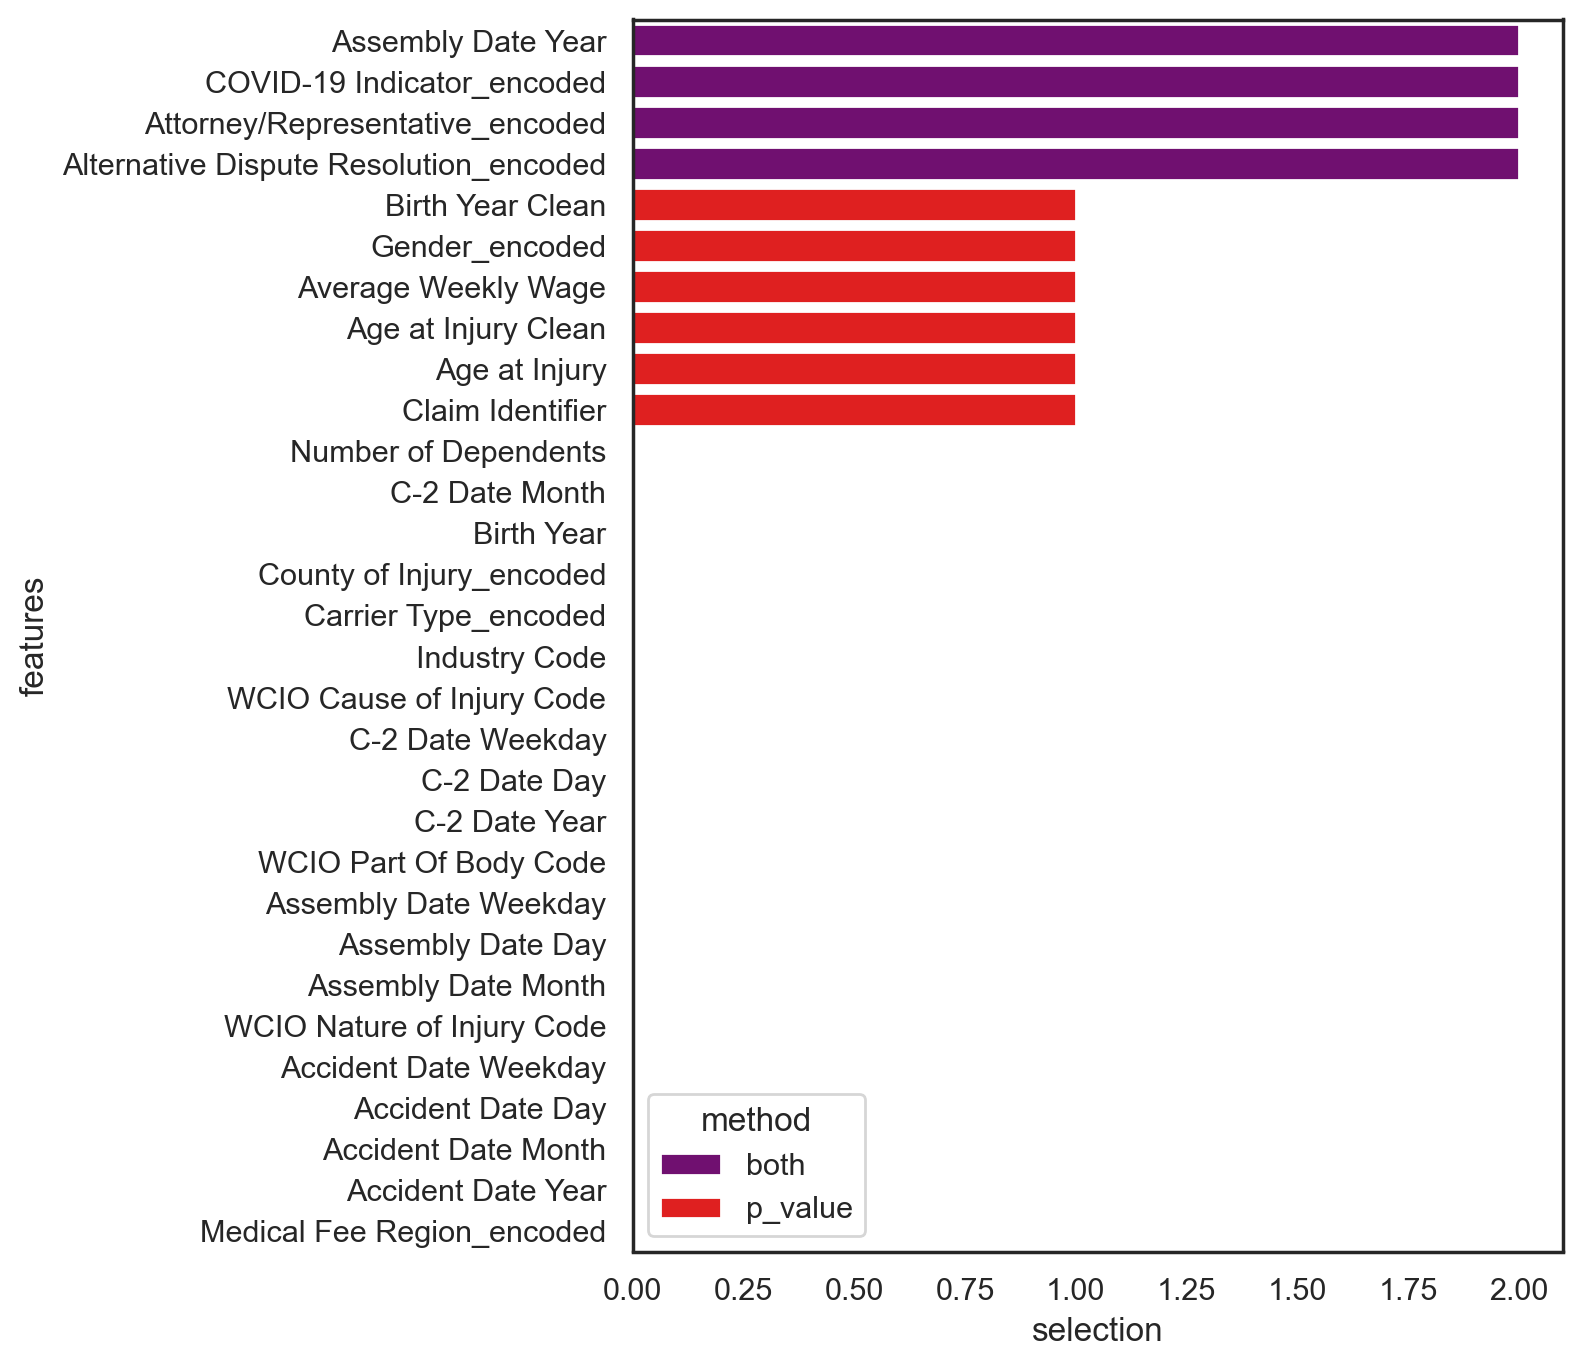

In [141]:
#### advanced feature selection
## 1. using Linear Regression - compare simple linear regressions and compare p-value (Anova)
## 2. using Ridge Regularization

# Split data
X = X_train.select_dtypes(include=["number"]).values
y = y_train.values

# Feature names
feature_names = X_train.select_dtypes(include=["number"]).columns

## p-value
selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## Ridge Regularization
selector = feature_selection.SelectFromModel(estimator= linear_model.Ridge(alpha=1.0, fit_intercept=True), max_features=20).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)

# plot
plt.figure(figsize=(6, 8))
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False,
            palette={"p_value":"red", "regularization":"blue", "both":"purple"});

## the red bars - variables selected by both methods (Anova and Ridge)
## blue bars - feature selected only by the first methid (Anova)

---

# 💾 Save Data 

In [144]:
# Save the training and validation sets
X_train.to_parquet('data/2ndNotebook/X_train.parquet', index=False, engine='fastparquet')
X_val.to_parquet('data/2ndNotebook/X_val.parquet', index=False, engine='fastparquet')
y_train.to_frame().to_parquet('data/2ndNotebook/y_train.parquet', index=False, engine='fastparquet')
y_val.to_frame().to_parquet('data/2ndNotebook/y_val.parquet', index=False, engine='fastparquet')

# Save the test set
test_data.to_parquet('data/2ndNotebook/test_data.parquet', index=False, engine='fastparquet')

---

# 🔗 Bibliography/References

**[[1]](https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering)** Koehrsten, Will. (2022), "Introduction to Manual Feature Engineering." https://kaggle.com/code/willkoehrsen/introduction-to-manual-feature-engineering

**[[2]](https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6)** Poon, Wing. (2022), "Feature Engineering for Machine Learning (1/3)." Medium. https://towardsdatascience.com/feature-engineering-for-machine-learning-a80d3cdfede6

**[3]** XXXXXXXXXXX

**[4]** XXXXXXXXXXX